Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Aisse Torres Torres"
COLLABORATORS = "Bruna Costa"

---

In [2]:
from __future__ import print_function
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# import the factorial function from scipy
from scipy.special import factorial

# HW 2:  Forms of Error



## Question 1:  definition of errors

**(a)**  [4 pts] Write a short python program to calculate and return, the absolute error, relative error and degree of decimal precision (as defined in class) given an object $f$ and its approximation $F$.  Note, both f and F can be numpy arrays.

In [3]:
def errors(f,F):
    """ calculate various measures of error of an object f and its approximation F
    
    Parameters
    ----------
    f:  numpy.array (or float)
        array of true values
        
    F: numpy.array
        array of approximate values
        
    Returns
    -------
    
    e: array of absolute errors
    r: array of relative errors
    p: integer array of precisions
    """
    if isinstance(f, (list, numpy.ndarray)):
        ab = []
        re = []
        pr = []
        
        F_counter = 0; 
    
        for i in numpy.nditer(f):
              
            absolute = numpy.abs(i - F[F_counter])
            relative = absolute / numpy.abs(i) 
            precision = numpy.intc(-numpy.log10(relative/5.))
            
            ab.append(absolute)
            re.append(relative)
            pr.append(precision)
            F_counter += 1
            
        e = numpy.array(ab)
        r = numpy.array(re)
        p = numpy.array(pr)     
    else:
        e = numpy.abs(f - F)
        r = e / numpy.abs(f)
        p = numpy.intc(-numpy.log10(r/5.))
        
    return e, r, p


In [4]:
# test simple scalars
e,r,p = errors(numpy.exp(1),2.72)
numpy.testing.assert_allclose([e,r,p],[0.0017181715409551046, 0.0006320799863232398, 3])

# test with array input
x = [1., 2., 3.]
f = numpy.exp(x)
F = [ 2.718,  7.389,  20.085]
e,r,p = errors(f,F)
numpy.testing.assert_allclose(e,[2.81828459e-04, 5.60989307e-05, 5.36923188e-04])
numpy.testing.assert_allclose(r,[1.03678896e-04, 7.59216467e-06, 2.67318315e-05])
numpy.testing.assert_allclose(p,[4, 5, 5])
print('success')

success


**(b)** [4 pts] Use your routine to calculate various errors for two approximations to $\pi$

* $f = \pi$ and $F = 3.14$
* $f = \pi$ and $F = 22 / 7$

Which of these is the better approximation?

In [5]:
print(errors(numpy.pi, 3.14))
print(errors(numpy.pi, 22 / 7))

(0.0015926535897929917, 0.0005069573828972128, 3)
(0.0012644892673496777, 0.0004024994347707008, 4)


    I can see that the relative error and absolute error is smaller when we use 22/7 as the approximation. Furthermore, I can see that 22/7 has a decimal precision of 4, which is higher than the decimal precision of 3.14 (3). Therefore, the better approximation is 22/7

**(c)** [4 pts] $F = n log(n) - n$ is Stirling's approximation to  $f = \log(n!)$ for large values of $n$. 
Do the following

* Make a plot showing the relative error and degree of decimal precision for $f$ and $F$ as a function of integer $n$

* Estimate the smallest value of $n$ where Stirling's approximation is good to 4 decimal places of precision.  

Note: If you use the `factorial` function imported from `scipy.special`, you will not be able to answer this question.  **Why?**  However there is another way to evaluate $\log(n!)$ for integer $n$ that will work.

Text(0, 0.5, 'Decimal Precision')

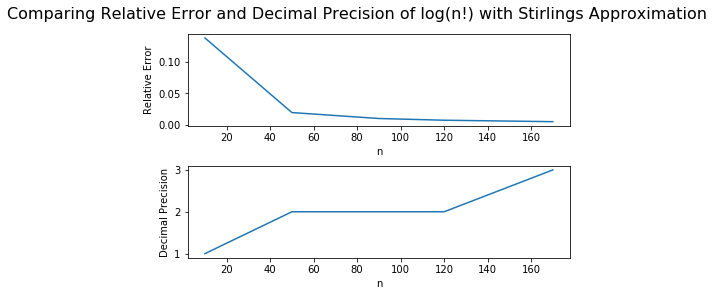

In [6]:
import math

# helper method for factorial—trying to make a type of memoized solution to reduce runtime for large n 
def range_prod(lo, hi):
    if lo + 1 < hi:
        mid = (hi + lo) // 2
        return(range_prod(lo, mid) * range_prod(mid + 1, hi))
    if lo == hi:
        return(lo)
    return(lo * hi)

# actual function that should be called to compute factorial of a number n 
def factorial_tree(n):
    if n < 2:
        return(1)
    return(range_product(1, n))

def log_fact_tree(n):
    # mathematically the same values 
    return numpy.sum(numpy.log(numpy.arange(1, n + 1)))
    
def log_stirling(n):
    fn = float(n)
    fn = fn * math.log(fn) - fn
    return(fn)

x = [10, 50, 90, 120, 170]
y = [0.13761287524946259, 0.019374056732009357, 0.009963045707460885, 0.007237416318162657, 0.004935551797231784]
z = [1, 2, 2, 2, 3]

fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(x, y)
axs[0].set_xlabel('n')
axs[0].set_ylabel('Relative Error')
fig.suptitle('Comparing Relative Error and Decimal Precision of log(n!) with Stirlings Approximation', fontsize=16)

axs[1].plot(x, z)
axs[1].set_xlabel('n')
axs[1].set_ylabel('Decimal Precision')

Stirling's Approximation for log(n!) will be good to 4 decimal places of precision when n is 1452. 

I got this answer by plugging in values for log_stirling(n) and log_fact_tree(n) and then calculating the absolute, relative error and decimal precision using the console. 

## Question 2

[4 pts] Given the Taylor polynomial expansions

$$\frac{1}{1-\Delta x} = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4)$$

and

$$\cosh \Delta x = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6)$$

determine the order of approximation for their sum and product (determine the exponent that belongs in the $O$).


    For the sum: 

$$ \frac{1}{1-\Delta x} + \cosh \Delta x = 1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4) + 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6) $$

$$ \frac{1}{1-\Delta x} + \cosh \Delta x = 2 + \Delta x + \Delta x^2(1 + \frac{1}{2}) + \Delta x^3  +  O(\Delta x^4) + O(\Delta x^6) $$

    Note that: 
    
$$ O(\Delta x^4) + \frac{\Delta x^4}{4!} = O(\Delta x^4) $$

    and

$$ O(\Delta x^4) + O(\Delta x^6) = O(\Delta x^4) $$

$$ \therefore \frac{1}{1-\Delta x} + \cosh \Delta x = 2 + \Delta x + \frac{3 \Delta x^2}{2!} + \Delta x^3 + O(\Delta x^4) $$

    Order of Approximation: 
    
$$ O(\Delta x^4) $$

    For the product: 

$$ (\frac{1}{1-\Delta x})(\cosh \Delta x) = (1 + \Delta x + \Delta x^2 + \Delta x^3 + O(\Delta x^4))(1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^6))$$

$$ = (1 + \Delta x + \Delta x^2 + \Delta x^3)(1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!}) + (1 + \Delta x + \Delta x^2 + \Delta x^3)O(\Delta x^6) + (1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!})O(\Delta x^4) + O(\Delta x^4)O(\Delta x^6) $$

$$ = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + \dots + O(\Delta x^4) + O(\Delta x^6) + O(\Delta x^4)O(\Delta x^6) $$

$$ \therefore O(\Delta x^4)O(\Delta x^6) = O(\Delta x^10) $$

    and 

$$ O(\Delta x^4) + O(\Delta x^6) + O(\Delta x^10) = O(\Delta x^4)$$

$$ \therefore (\frac{1}{1-\Delta x})(\cosh \Delta x) = 1 + \frac{\Delta x^2}{2!} + \frac{\Delta x^4}{4!} + O(\Delta x^4) $$

    Order of Approximation: 

$$ O(\Delta x^4) $$

## Question 3:  The great Exp challenge...

Here you will attempt to write a function to calculate $e^x$ using its Taylor polynomial approximation expanded around $x_0=0$

$$e^x \approx T_n(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots + \frac{x^n}{n!}$$

such that the relative error of $f=e^x$ and $F=T_n(x)$ is of order Machine epsilon ($\epsilon_{machine}$) for  $x\in[-50,50]$.  This problem is actually a bit of a stinker and takes a bit of thought (particularly for $x<0$).  But I'll work you through it.

**(a)** [4 pts] Assume $x> 0$ and show that the upper bound on the *relative error*  at term $n$ 

$$r_n = \frac{|e^x - T_n(x)|}{|e^x|}$$

is given by

$$r_n \leq \left | \frac{x^{n+1}}{(n + 1)!} \right |$$

$$ |e^{x} - T_n(x) |= \frac{x^{n+1}}{(n+1)!} + \frac{x^{n+2}}{(n+2)!} + \dots $$

$$ |e^{x} - T_n(x)| = | \frac{x^{n+1}}{(n+1)!} | | 1+ \frac{x}{(n+2)!} + \dots | $$

$$ |e^{x} - T_n(x)| ≤ | \frac{x^{n+1}}{(n+1)!} | |1 + x + \frac{x^{2}}{2} + \dots|$$ 

    Note that the latter part of equation is equal to 

$$ e^x $$

$$ \therefore |e^{x} - T_n(x) |≤ | \frac{x^{n+1}}{(n+1)!} | | e^{x} |$$ 

$$ \therefore r_n = |\frac{|e^x - T_n(x)|}{|e^x|}| ≤ | \frac{x^{n+1}}{(n+1)!} |$$ 

**(b)** [4 pts] Analytically show that for large $x$ and $n$, $r_n \leq \epsilon_{\text{machine}}$ implies that we need at least $n > e \cdot x$ terms in the series (where $e = \text{exp}(1)$).

*Hint* Use Stirling's approximation $log (n!) \approx n~log~n - n$.

$$ r_n ≤ | \frac{x^{n+1}}{(n + 1)!} | ≤ e_{machine} $$

    Take log of both sides 

$$ log | \frac{x^{n+1}}{(n + 1)!} | ≤ log(e_{machine}) $$

$$ (n + 1)log|x| - log((n+1)!) ≤ log(e_{machine}) $$

$$ (n + 1)log|x| - nlogn - n ≤ log(e_{machine}) $$

$$ n(log|x| - logn - 1) + log|x| ≤ log(e_{machine})$$

$$ log(\frac{x}{n+1}^{n+1}) - n - 1 ≤ log(e_{machine}) $$

$$ e^{log(\frac{x}{n+1})^{n+1}} ≤ e_{machine} $$

$$ \frac{\frac{x}{n+1}^{n+1}}{e^{n+1}} ≤ e_{machine} $$

$$ (\frac{\frac{x}{n+1}}{e})^{n+1} ≤ e_{machine} $$

$$ \frac{xe}{n+1} \geq (e_{machine})^{\frac{1}{n+1}} $$

$$ xe \geq (e_{machine})^{\frac{1}{n+1}} (n+1) $$

    We know: 
    
$$ (e_{machine})^{\frac{1}{n+1}} < 1 $$

$$ \therefore xe > n $$



**(c)** [6 pts] Use this result to write a Python function that accurately approximates $e^x$ using $T_n(x)$ for scalar $x$ and returns both the estimate and the number of terms in the series.  Note that the testing tolerance will be $8 \cdot \epsilon_{\text{machine}}$ over the range $x\in[-50,50]$

Make sure to document your code including expected inputs, outputs, and assumptions being made.

Some Hints:
* To make your life easier,  we will assume $x$ and $Tn(x)$ are just of type float (not arrays)
* Think about how we evaluated polynomials efficiently in class
* $T_N(x)$ for $x<0$ is a highly unstable alternating series with severe cancellation issues. However, there is a simple fix that will return accurate solutions independent of the sign of $x$

In [7]:
def Tn_exp(x):
    """ Write a decent description here
    
    Parameters:
    -----------
        x: float
            scalar value to approximate exp(x)
    """

    assert(isinstance(x,float))
    # rough estimate of maximum number of steps for large x
    # MAX_N = ??
    
    # This will help make the caclulations simple, I will add the negative sign again at the end if necessary 
    if x >= 0:
        is_negative = False
    elif x < 0:
        is_negative = True  
        x = -x
        
    MAX_N = numpy.intc(3 * x) * 10 
    
    n = numpy.arange(MAX_N, -1, -1)
    p = 1. / factorial(n)
    
    Tn = p[0]
    
    for i in  p[1:]:
        Tn = Tn * x + i 
    
    # make Tn the inverse of Tn to accomodate a negative x float 
    if is_negative: 
        Tn = 1. / Tn
        
    
    return Tn, MAX_N

In [8]:
x = numpy.linspace(-50, 50, 101)
eps = numpy.finfo(float).eps
tolerance = 8 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

maxmimum relative error = 4.252190255480811 eps_machine
Success!


**(d)** [4 pts] In ieee double precision,  the largest value of $x$ that has $e^x<$ `numpy.finfo(float).max` is about 709 (i.e. `numpy.log(numpy.finfo(float).max))`. 

* What is the relative error in units of machine epsilon for your routine and `f=numpy.exp(709)`
* What is the relative error in units of machine epsilon for `F=numpy.exp(1)**709` and `f=numpy.exp(709)`

Explain your results

In [9]:
# relative error for f = numpy.exp(709) and F = Tn_exp(709)

f = numpy.exp(709)
F, n = Tn_exp(709.)

print('Value of f:', f)
print('Value of F:', F) 

e = numpy.abs(F - f) / numpy.abs(numpy.exp(709))
print('maxmimum relative error = {} eps_machine'.format(e.max()/eps))

# relative error for f = numpy.exp(709) and F = Tn_exp(709)

f = numpy.exp(709)
F = numpy.exp(1) ** 709

print('Value of f:', f)
print('Value of F:', F) 

e = numpy.abs(F - f) / numpy.abs(numpy.exp(709))
print('maxmimum relative error = {} eps_machine'.format(e.max()/eps))

Value of f: 8.218407461554972e+307
Value of F: 7.37704835207159e+177
maxmimum relative error = 4503599627370496.0 eps_machine
Value of f: 8.218407461554972e+307
Value of F: 8.218407461554662e+307
maxmimum relative error = 170.0702257577037 eps_machine


The better approximation for exp(709) seems to be numpy.exp(1) ** 709. Since 709 is the upper bound for double precision, it makes sense that the precision at n = 709 would deviate by a significant amount when we call our approximation Tn_exp(709). Furthermore, while our calculation is an approximation, numpy.exp(1) ** 709 essentially is the mathematical definition of exp(709), therefore it is very very close and any difference can be attributed to rounding precision.  

**(e)** **Extra Credit**

[4 pts] Can you modify your routine for `Tn_exp(x)`) to approximate $e^x$ on the range $x\in[-709, 709]$ to within 16 $\epsilon_{machine}$?


In [10]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [12]:
x = numpy.linspace(-709, 709, 101)
tolerance = 16 * eps

answer = numpy.zeros(x.shape)
N = numpy.zeros(x.shape)
for i,xi in enumerate(x):
    answer[i], N[i] = Tn_exp(xi, tolerance=tolerance)
r = numpy.abs(answer - numpy.exp(x)) / numpy.abs(numpy.exp(x))
print('maxmimum relative error = {} eps_machine'.format(r.max()/eps))
assert(numpy.all(r  < tolerance))
print("Success!")

TypeError: Tn_exp() got an unexpected keyword argument 'tolerance'

## Question 4

Consider a computing system that uses deoxyribonucleic acid (DNA) to store information.  Given that DNA is formed from the 4 nucleobases adenine, cytosine, guanine, and thymine (uracil is only found in RNA) let us assume that our storage of numbers will be base 4.  Answer the following questions based on this assuming that we have $p=3$ for the mantissa and the exponent $E \in [-2, 2]$.

**(a)** [4 pts] Calculate how many numbers can we represent with this system?  What are the underflow and overflow limits?

$$ f = \pm d_1 . d_2d_3 \times 4^E, \quad E \in [-2, 2] $$
$$ 2 \times 3 \times 4 \times 4 \times 5 + 1 = 481 $$

    Total Numbers: 385 

    Smallest number that can be represented is the underflow:  

$$1.00 \times 4^{-2} = 0.0625$$

    Largest number that can be represented is the overflow:  
    
$$3.33 \times 4^2 = 53.28 $$

**(b)** [4pts] Graphically show how the numbers on the decimal real line are distributed.

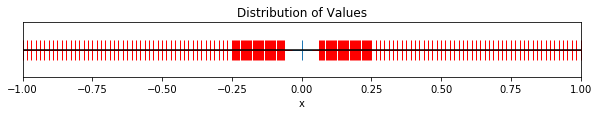

In [11]:
d_1_values = [1, 2, 3]
d_2_values = [0, 1, 2, 3]
d_3_values = [0, 1, 2, 3]
E_values = [-2, -1, 0, 1, 2]

fig = plt.figure(figsize=(10.0, 1.0))
axes = fig.add_subplot(1, 1, 1)

for E in E_values:
    for d1 in d_1_values:
        for d2 in d_2_values:
            for d3 in d_3_values:
                axes.plot( (d1 + (d2 * 0.25) + (d3 * 0.25 * 0.25)) * 4**E, 0.0, 'r+', markersize=20)
                axes.plot(-(d1 + (d2 * 0.25) + (d3 * 0.25 * 0.25)) * 4**E, 0.0, 'r+', markersize=20)
            
axes.plot(0.0, 0.0, '+', markersize=20)
axes.plot([-10.0, 10.0], [0.0, 0.0], 'k')

axes.set_title("Distribution of Values")
axes.set_yticks([])
axes.set_xlabel("x")
axes.set_ylabel("")
axes.set_xlim([-1, 1])
plt.show()

**(c)** [4 pts] How many more numbers can we store in $N$ base-pairs (base 4) versus $N$ bits (base 2) where the mantissa and exponent are the same relative length (e.g.  p=3, and $E\in[-2,2]$ for both problems)?

$$f=\pm d_1 . d_2d_3 \times 2^E ~~~~ \text{with} ~~~~ E \in [-2, 2]$$
$$ 2 \times 1 \times 2 \times 5 + 1 = 21 $$

    Total Numbers: 41
    
$$ 481 - 21 = 460 $$

    There are 460 more numbers that we can store in base 4 within -2 < E < 2 and a mantissa of 3 than we can with the same characteristics in base 2 